In [ ]:
!nvidia-smi

Wed Oct 25 20:55:40 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Caricare il Dataset in memoria:

Librerie:

In [ ]:
import glob
import keras
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

Asscicurarsi di caricare le 3 cartelle nel data_pat

Caricare il dataset: Train Data

In [ ]:
data_path="/content/drive/MyDrive/Colab Notebooks/Data/"

classMax=6  #The number of classes in the dataset
encoded_labels = to_categorical(range(classMax))

print("Loading Dataset...")

train_class0_imgs=[]
train_class0_labels=[]
for folder in glob.glob(data_path+"train/matiz black"):
    imgs = glob.glob(folder+"/*")
    print("-", folder,"- imgs:",len(imgs))
    for i in range(len(imgs)):
        img = image.load_img(imgs[i], target_size=(150, 150))
        img_array = image.img_to_array(img)
        train_class0_imgs.append(np.array(img_array))
        train_class0_labels.append(encoded_labels[0])

train_class1_imgs=[]
train_class1_labels=[]
for folder in glob.glob(data_path+"train/matiz red"):
    imgs = glob.glob(folder+"/*")
    print("-", folder,"- imgs:",len(imgs))
    for i in range(len(imgs)):
        img = image.load_img(imgs[i], target_size=(150, 150))
        img_array = image.img_to_array(img)
        train_class1_imgs.append(np.array(img_array))
        train_class1_labels.append(encoded_labels[1])

train_class2_imgs=[]
train_class2_labels=[]
for folder in glob.glob(data_path+"train/rio black"):
    imgs = glob.glob(folder+"/*")
    print("-", folder,"- imgs:",len(imgs))
    for i in range(len(imgs)):
        img = image.load_img(imgs[i], target_size=(150, 150))
        img_array = image.img_to_array(img)
        train_class2_imgs.append(np.array(img_array))
        train_class2_labels.append(encoded_labels[2])

train_class3_imgs=[]
train_class3_labels=[]
for folder in glob.glob(data_path+"train/rio red"):
    imgs = glob.glob(folder+"/*")
    print("-", folder, "- imgs:", len(imgs))
    for i in range(len(imgs)):
        img = image.load_img(imgs[i], target_size=(150, 150))
        img_array = image.img_to_array(img)
        train_class3_imgs.append(np.array(img_array))
        train_class3_labels.append(encoded_labels[3])

train_class4_imgs=[]
train_class4_labels=[]
for folder in glob.glob(data_path+"train/tiggo black"):
    imgs = glob.glob(folder+"/*")
    print("-", folder,"- imgs:",len(imgs))
    for i in range(len(imgs)):
        img = image.load_img(imgs[i], target_size=(150, 150))
        img_array = image.img_to_array(img)
        train_class4_imgs.append(np.array(img_array))
        train_class4_labels.append(encoded_labels[4])

train_class5_imgs=[]
train_class5_labels=[]
for folder in glob.glob(data_path+"train/tiggo red"):
    imgs = glob.glob(folder+"/*")
    print("-", folder,"- imgs:",len(imgs))
    for i in range(len(imgs)):
        img = image.load_img(imgs[i], target_size=(150, 150))
        img_array = image.img_to_array(img)
        train_class5_imgs.append(np.array(img_array))
        train_class5_labels.append(encoded_labels[5])

Loading Dataset...
- /content/drive/MyDrive/Colab Notebooks/Data/train/matiz black - imgs: 140
- /content/drive/MyDrive/Colab Notebooks/Data/train/matiz red - imgs: 140
- /content/drive/MyDrive/Colab Notebooks/Data/train/rio black - imgs: 140
- /content/drive/MyDrive/Colab Notebooks/Data/train/rio red - imgs: 140
- /content/drive/MyDrive/Colab Notebooks/Data/train/tiggo black - imgs: 140
- /content/drive/MyDrive/Colab Notebooks/Data/train/tiggo red - imgs: 140


Caricare il dataset: Validation Data

In [ ]:
data_path="/content/drive/MyDrive/Colab Notebooks/Data/"

classMax=6  #The number of classes in the dataset
encoded_labels = to_categorical(range(classMax))

print("Loading Dataset...")

val_class0_imgs=[]
val_class0_labels=[]
for folder in glob.glob(data_path+"val/matiz black"):
    imgs = glob.glob(folder+"/*")
    print("-", folder,"- imgs:",len(imgs))
    for i in range(len(imgs)):
        img = image.load_img(imgs[i], target_size=(150, 150))
        img_array = image.img_to_array(img)
        val_class0_imgs.append(np.array(img_array))
        val_class0_labels.append(encoded_labels[0])

val_class1_imgs=[]
val_class1_labels=[]
for folder in glob.glob(data_path+"val/matiz red"):
    imgs = glob.glob(folder+"/*")
    print("-", folder,"- imgs:",len(imgs))
    for i in range(len(imgs)):
        img = image.load_img(imgs[i], target_size=(150, 150))
        img_array = image.img_to_array(img)
        val_class1_imgs.append(np.array(img_array))
        val_class1_labels.append(encoded_labels[1])

val_class2_imgs=[]
val_class2_labels=[]
for folder in glob.glob(data_path+"val/rio black"):
    imgs = glob.glob(folder+"/*")
    print("-", folder,"- imgs:",len(imgs))
    for i in range(len(imgs)):
        img = image.load_img(imgs[i], target_size=(150, 150))
        img_array = image.img_to_array(img)
        val_class2_imgs.append(np.array(img_array))
        val_class2_labels.append(encoded_labels[2])

val_class3_imgs=[]
val_class3_labels=[]
for folder in glob.glob(data_path+"val/rio red"):
    imgs = glob.glob(folder+"/*")
    print("-", folder, "- imgs:", len(imgs))
    for i in range(len(imgs)):
        img = image.load_img(imgs[i], target_size=(150, 150))
        img_array = image.img_to_array(img)
        val_class3_imgs.append(np.array(img_array))
        val_class3_labels.append(encoded_labels[3])

val_class4_imgs=[]
val_class4_labels=[]
for folder in glob.glob(data_path+"val/tiggo black"):
    imgs = glob.glob(folder+"/*")
    print("-", folder,"- imgs:",len(imgs))
    for i in range(len(imgs)):
        img = image.load_img(imgs[i], target_size=(150, 150))
        img_array = image.img_to_array(img)
        val_class4_imgs.append(np.array(img_array))
        val_class4_labels.append(encoded_labels[4])

val_class5_imgs=[]
val_class5_labels=[]
for folder in glob.glob(data_path+"val/tiggo red"):
    imgs = glob.glob(folder+"/*")
    print("-", folder,"- imgs:",len(imgs))
    for i in range(len(imgs)):
        img = image.load_img(imgs[i], target_size=(150, 150))
        img_array = image.img_to_array(img)
        val_class5_imgs.append(np.array(img_array))
        val_class5_labels.append(encoded_labels[5])


Loading Dataset...
- /content/drive/MyDrive/Colab Notebooks/Data/val/matiz black - imgs: 30
- /content/drive/MyDrive/Colab Notebooks/Data/val/matiz red - imgs: 30
- /content/drive/MyDrive/Colab Notebooks/Data/val/rio black - imgs: 30
- /content/drive/MyDrive/Colab Notebooks/Data/val/rio red - imgs: 30
- /content/drive/MyDrive/Colab Notebooks/Data/val/tiggo black - imgs: 30
- /content/drive/MyDrive/Colab Notebooks/Data/val/tiggo red - imgs: 30


Caricare il dataset: Test Data

In [ ]:
data_path="/content/drive/MyDrive/Colab Notebooks/Data/"

classMax=6  #The number of classes in the dataset
encoded_labels = to_categorical(range(classMax))

print("Loading Dataset...")

test_class0_imgs=[]
test_class0_labels=[]
for folder in glob.glob(data_path+"test/matiz black"):
    imgs = glob.glob(folder+"/*")
    print("-", folder,"- imgs:",len(imgs))
    for i in range(len(imgs)):
        img = image.load_img(imgs[i], target_size=(150, 150))
        img_array = image.img_to_array(img)
        test_class0_imgs.append(np.array(img_array))
        test_class0_labels.append(encoded_labels[0])

test_class1_imgs=[]
test_class1_labels=[]
for folder in glob.glob(data_path+"test/matiz red"):
    imgs = glob.glob(folder+"/*")
    print("-", folder,"- imgs:",len(imgs))
    for i in range(len(imgs)):
        img = image.load_img(imgs[i], target_size=(150, 150))
        img_array = image.img_to_array(img)
        test_class1_imgs.append(np.array(img_array))
        test_class1_labels.append(encoded_labels[1])

test_class2_imgs=[]
test_class2_labels=[]
for folder in glob.glob(data_path+"test/rio black"):
    imgs = glob.glob(folder+"/*")
    print("-", folder,"- imgs:",len(imgs))
    for i in range(len(imgs)):
        img = image.load_img(imgs[i], target_size=(150, 150))
        img_array = image.img_to_array(img)
        test_class2_imgs.append(np.array(img_array))
        test_class2_labels.append(encoded_labels[2])

test_class3_imgs=[]
test_class3_labels=[]
for folder in glob.glob(data_path+"test/rio red"):
    imgs = glob.glob(folder+"/*")
    print("-", folder, "- imgs:", len(imgs))
    for i in range(len(imgs)):
        img = image.load_img(imgs[i], target_size=(150, 150))
        img_array = image.img_to_array(img)
        test_class3_imgs.append(np.array(img_array))
        test_class3_labels.append(encoded_labels[3])

test_class4_imgs=[]
test_class4_labels=[]
for folder in glob.glob(data_path+"test/tiggo black"):
    imgs = glob.glob(folder+"/*")
    print("-", folder,"- imgs:",len(imgs))
    for i in range(len(imgs)):
        img = image.load_img(imgs[i], target_size=(150, 150))
        img_array = image.img_to_array(img)
        test_class4_imgs.append(np.array(img_array))
        test_class4_labels.append(encoded_labels[4])

test_class5_imgs=[]
test_class5_labels=[]
for folder in glob.glob(data_path+"test/tiggo red"):
    imgs = glob.glob(folder+"/*")
    print("-", folder,"- imgs:",len(imgs))
    for i in range(len(imgs)):
        img = image.load_img(imgs[i], target_size=(150, 150))
        img_array = image.img_to_array(img)
        test_class5_imgs.append(np.array(img_array))
        test_class5_labels.append(encoded_labels[5])


Loading Dataset...
- /content/drive/MyDrive/Colab Notebooks/Data/test/matiz black - imgs: 30
- /content/drive/MyDrive/Colab Notebooks/Data/test/matiz red - imgs: 30
- /content/drive/MyDrive/Colab Notebooks/Data/test/rio black - imgs: 30
- /content/drive/MyDrive/Colab Notebooks/Data/test/rio red - imgs: 30
- /content/drive/MyDrive/Colab Notebooks/Data/test/tiggo black - imgs: 30
- /content/drive/MyDrive/Colab Notebooks/Data/test/tiggo red - imgs: 30


## Dataset Preprocessing

Negli step precedenti abbiamo letto il contenuto di ciascuna cartella. Abbiamo aggiunto in appending ciascuna immagine di ogni cartella nella variablie _class_imag e abbiamo aggiunto il nome della cartella (usando un encoding crescente) alla variabile _class_label. In questo modo tutte le immagini di una certa cartella avranno la stessa label.
Ora questi elenchi vengono concatenati in maniera ordinata nelle variabili X_train, X_test e X_val. Gli elenchi delle labels subiscono lo stesso processamento.
Come ultimo passaggio tutte le variabili vengono convertite in numpy.array

In [ ]:
X_train = train_class0_imgs + train_class1_imgs + train_class2_imgs + train_class3_imgs + train_class4_imgs + train_class5_imgs
X_test = test_class0_imgs + test_class1_imgs + test_class2_imgs + test_class3_imgs + test_class4_imgs + test_class5_imgs
X_val = val_class0_imgs + val_class1_imgs + val_class2_imgs + val_class3_imgs + val_class4_imgs + val_class5_imgs

y_train = train_class0_labels + train_class1_labels + train_class2_labels + train_class3_labels + train_class4_labels + train_class5_labels
y_test = test_class0_labels + test_class1_labels + test_class2_labels + test_class3_labels + test_class4_labels + test_class5_labels
y_val = val_class0_labels + val_class1_labels + val_class2_labels + val_class3_labels + val_class4_labels + val_class5_labels


X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

X_val = np.array(X_val)
y_val = np.array(y_val)


In [ ]:
X_train, X_test, y_train, y_test = train_test(class0_imgs, class1_imgs, class0_labels, class1_labels)

Images: 400 - Labels: 400


In [ ]:

print("X_train:",X_train.shape)
print("X_valid:",X_val.shape)
print("X_test:",X_test.shape)

X_train: (840, 150, 150, 3)
X_valid: (180, 150, 150, 3)
X_test: (180, 150, 150, 3)


## Rete Neurale Convoluzionale

### (Model-1) Rete addestrata da zero

Utilizziamo una Vgg16:

In [ ]:
input_shape = (X_train.shape[1],X_train.shape[2],3)

batch_size = 2
epochs = 50
learning_rate = 1e-5
metrics = ['accuracy']

optimizer = Adam(lr = learning_rate)

In [ ]:
model1 = VGG16(input_shape=input_shape, include_top=True, weights=None, classes=classMax)
model1.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=metrics)

history1 = model1.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))

Epoch 1/50
420/420 [==============================] - 34s 44ms/step - loss: 21.4131 - accuracy: 0.1738 - val_loss: 1.7919 - val_accuracy: 0.1667
Epoch 2/50
420/420 [==============================] - 18s 43ms/step - loss: 1.7936 - accuracy: 0.1524 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 3/50
420/420 [==============================] - 18s 42ms/step - loss: 1.7928 - accuracy: 0.1548 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 4/50
420/420 [==============================] - 18s 42ms/step - loss: 1.7924 - accuracy: 0.1357 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 5/50
420/420 [==============================] - 18s 44ms/step - loss: 1.7925 - accuracy: 0.1298 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 6/50
420/420 [==============================] - 18s 43ms/step - loss: 1.7925 - accuracy: 0.1476 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 7/50
420/420 [==============================] - 18s 43ms/step - loss: 1.7925 - accuracy: 0.1369 - val_loss: 1.7918 - val_accuracy

Grafico di training:

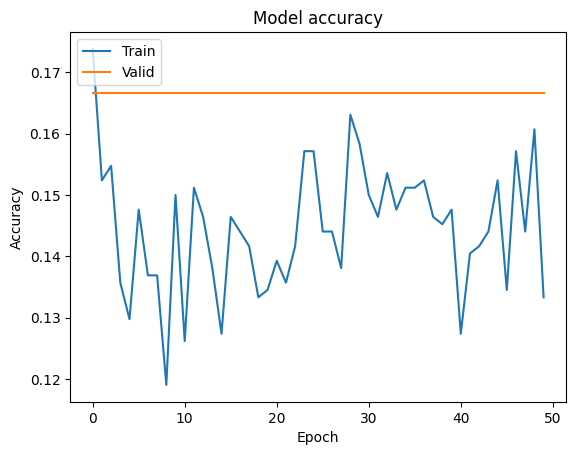

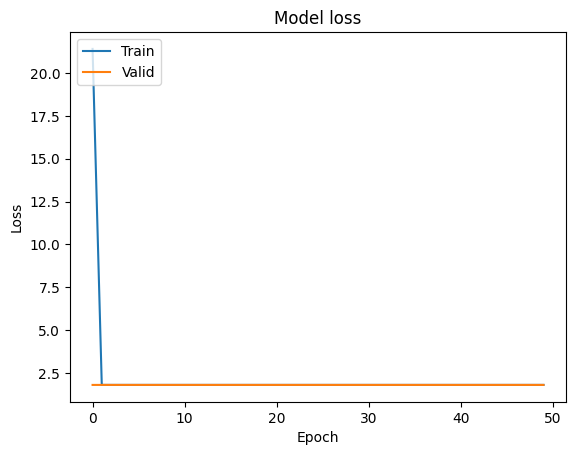

In [ ]:
def plot_history(history, X_test, y_test):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Valid'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Valid'], loc='upper left')
    plt.show()

plot_history(history1, X_val, y_val)

### (Model-2) Rete Preaddestrata su ImageNet

[link text](https://)Utilizziamo una Vgg16 preaddestrata su ImageNet.

ImageNet è stata addestrata su immagini RGB quindi occorre avere array a 3 dimensioni come input. Visto che noi stiamo giá lavorando con oggetti a 3 dimensioni (i canali Red, Green e Blue rappresentano la terza dimensione dei nostri arrays) nessun altro pre-processamento é necessario per sfruttare ImageNet.

In [ ]:
#X_train3 = np.repeat(X_train, 3, axis=3)
#X_valid3 = np.repeat(X_valid, 3, axis=3)
#X_test3 = np.repeat(X_test, 3, axis=3)

#input_shape3 = (X_train.shape[1],X_train.shape[2], 3)

In [ ]:
input_shape = (X_train.shape[1],X_train.shape[2],3)

batch_size = 2
epochs = 50
learning_rate = 1e-5
metrics = ['accuracy']

optimizer = Adam(lr = learning_rate)

In [ ]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D

# create the base pre-trained model
base_model = VGG16(input_shape=input_shape, include_top=False, weights= 'imagenet')

# Freeze the layers except the last 4 layers
for layer in base_model.layers:
    layer.trainable = False

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer
predictions = Dense(classMax, activation='softmax')(x)

# this is the model we will train
model2 = Model(inputs=base_model.input, outputs=predictions)

model2.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=metrics)


history2 = model2.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))

58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/50
420/420 [==============================] - 16s 14ms/step - loss: 5.1456 - accuracy: 0.5917 - val_loss: 2.6606 - val_accuracy: 0.6333
Epoch 2/50
420/420 [==============================] - 5s 13ms/step - loss: 0.8395 - accuracy: 0.8071 - val_loss: 1.5724 - val_accuracy: 0.6889
Epoch 3/50
420/420 [==============================] - 5s 12ms/step - loss: 0.3774 - accuracy: 0.9036 - val_loss: 1.7102 - val_accuracy: 0.7111
Epoch 4/50
420/420 [==============================] - 6s 13ms/step - loss: 0.2219 - accuracy: 0.9369 - val_loss: 2.5672 - val_accuracy: 0.6278
Epoch 5/50
420/420 [==============================] - 6s 13ms/step - loss: 0.2434 - accuracy: 0.9226 - val_loss: 1.7551 - val_accuracy: 0.7167
Epoch 6/50
420/420 [==============================] - 6s 13ms/step - loss: 0.1916 - accuracy: 0.9393 - val_loss: 3.2837 - val_accuracy: 0.6000
Epoch 7/50
420/420 [==============================] - 5s 13ms/step - loss: 0

Grafico di training:

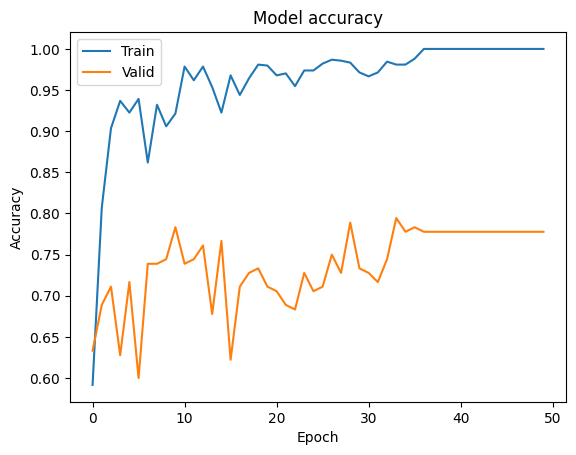

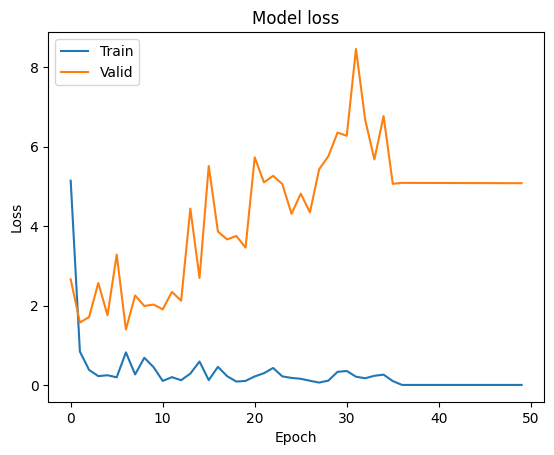

In [ ]:
def plot_history(history, X_test, y_test):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Valid'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Valid'], loc='upper left')
    plt.show()

plot_history(history2, X_val, y_val)

Usiamo ora i valori X del data set di validation per fare prediction delle classi. I valori predetti verrano poi confrontati con y_val

In [ ]:
pred = model2.predict(X_val)
np.argmax(pred,axis=1)

6/6 [==============================] - 5s 377ms/step


array([0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 4, 0, 2, 2, 0, 2,
       2, 4, 2, 2, 2, 2, 4, 2, 2, 0, 0, 0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 3, 1, 3, 0, 3, 3, 3, 1, 3, 3, 5, 3, 3, 3, 3, 3, 3, 1, 1, 3,
       5, 3, 1, 3, 3, 3, 1, 3, 3, 1, 4, 4, 4, 4, 2, 0, 4, 5, 4, 4, 4, 4,
       4, 4, 0, 2, 4, 4, 4, 4, 2, 4, 4, 4, 0, 4, 4, 4, 4, 0, 5, 5, 5, 3,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 3, 5, 5, 5, 4, 1,
       5, 5, 5, 5])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

pred = model2.predict(X_val)
y_pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_val,axis=1)

disp = ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred),
          display_labels = ['maz\nblack','maz\nred','rio\nblack','rio\nred','tiggo\nblack','tiggo\nred'])




6/6 [==============================] - 0s 75ms/step


Come si vede bene in questa confusion matrix, la rete riesce ad individurare molto bene il colore, ma si sbaglia sul modelle della macchina (con risultati di classificazione cmq ottimi). Peró interessante notare che gli errori sono sbilanciati

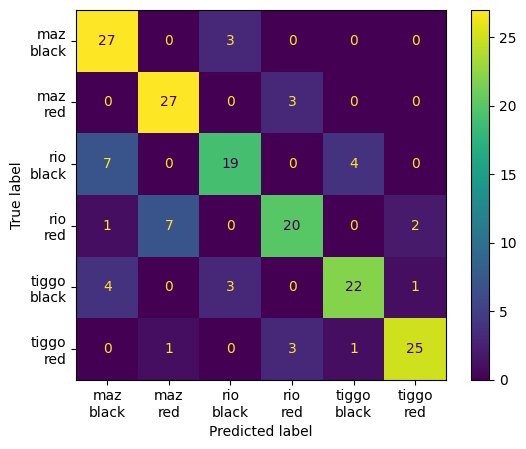

In [ ]:
disp.plot()

accuracy score sul test set

In [ ]:
from sklearn.metrics import accuracy_score

pred = model2.predict(X_test)
y_pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_test,axis=1)

accuracy_score(y_true, y_pred)

6/6 [==============================] - 1s 83ms/step


0.7888888888888889

riproviamo il training con 5 epocha

In [ ]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D

batch_size = 2
epochs = 5
learning_rate = 1e-5
metrics = ['accuracy']

optimizer = Adam(lr = learning_rate)

# create the base pre-trained model
base_model = VGG16(input_shape=input_shape, include_top=False, weights= 'imagenet')

# Freeze the layers except the last 4 layers
for layer in base_model.layers:
    layer.trainable = False

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer
predictions = Dense(classMax, activation='softmax')(x)

# this is the model we will train
model3 = Model(inputs=base_model.input, outputs=predictions)

model3.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=metrics)


history3 = model3.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))

Epoch 1/5
420/420 [==============================] - 7s 15ms/step - loss: 5.4255 - accuracy: 0.5810 - val_loss: 2.9029 - val_accuracy: 0.6333
Epoch 2/5
420/420 [==============================] - 6s 13ms/step - loss: 0.8320 - accuracy: 0.7917 - val_loss: 1.8737 - val_accuracy: 0.7000
Epoch 3/5
420/420 [==============================] - 5s 13ms/step - loss: 0.3362 - accuracy: 0.8929 - val_loss: 1.0827 - val_accuracy: 0.7778
Epoch 4/5
420/420 [==============================] - 6s 14ms/step - loss: 0.2302 - accuracy: 0.9405 - val_loss: 2.0819 - val_accuracy: 0.7278
Epoch 5/5
420/420 [==============================] - 6s 13ms/step - loss: 0.2887 - accuracy: 0.9202 - val_loss: 1.7772 - val_accuracy: 0.6667


In [ ]:
pred = model3.predict(X_test)
y_pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_test,axis=1)

accuracy_score(y_true, y_pred)

6/6 [==============================] - 1s 74ms/step


0.6444444444444445

## Aggiungere Data Augmentation

### Utilizziamo classe predefinita di Keras, cioè ImageDataGenerator():

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_data_generator = ImageDataGenerator(
        featurewise_center=False,
        featurewise_std_normalization=False,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True
)

Dobbiamo cambiare la modalità di training e usare fit_generator() invece di fit().

Come rete usiamo il model-2, già compilata nelle fasi precedenti, visto che ha dato giá ottimi risultati

In [ ]:
batch_size = 2
epochs = 50
learning_rate = 1e-5
metrics = ['accuracy']

optimizer = Adam(lr = learning_rate)

history4 = model2.fit(
    image_data_generator.flow(X_train, y_train, batch_size=batch_size),
    steps_per_epoch=int(X_train.shape[0] / batch_size),
    epochs=epochs,
    validation_data=(X_val, y_val), validation_steps=int(X_test.shape[0] / batch_size))

Epoch 1/50
420/420 [==============================] - 9s 21ms/step - loss: 0.4148 - accuracy: 0.8988 - val_loss: 2.0274 - val_accuracy: 0.7778
Epoch 2/50
420/420 [==============================] - 9s 20ms/step - loss: 0.4456 - accuracy: 0.8905 - val_loss: 1.8871 - val_accuracy: 0.7611
Epoch 3/50
420/420 [==============================] - 7s 17ms/step - loss: 0.4287 - accuracy: 0.8976 - val_loss: 2.3095 - val_accuracy: 0.7556
Epoch 4/50
420/420 [==============================] - 9s 20ms/step - loss: 0.4979 - accuracy: 0.8750 - val_loss: 2.1453 - val_accuracy: 0.7722
Epoch 5/50
420/420 [==============================] - 9s 21ms/step - loss: 0.3860 - accuracy: 0.9095 - val_loss: 2.4108 - val_accuracy: 0.7778
Epoch 6/50
420/420 [==============================] - 10s 24ms/step - loss: 0.3866 - accuracy: 0.8988 - val_loss: 2.3347 - val_accuracy: 0.7278
Epoch 7/50
420/420 [==============================] - 10s 24ms/step - loss: 0.3573 - accuracy: 0.9024 - val_loss: 1.7285 - val_accuracy: 0.74

Grafico di training:

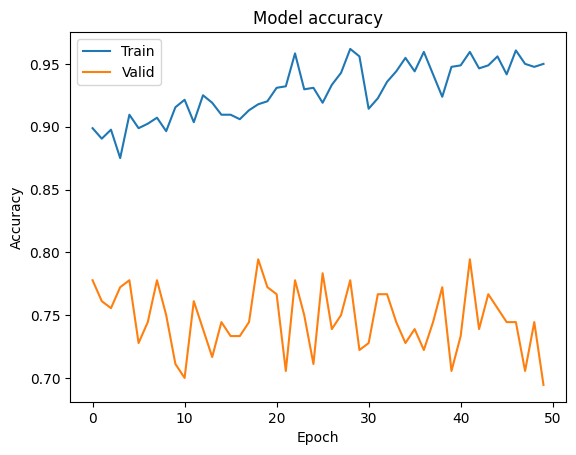

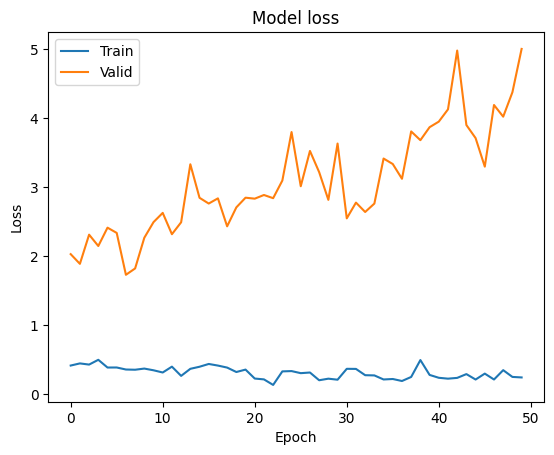

In [ ]:
def plot_history(history, X_test, y_test):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Valid'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Valid'], loc='upper left')
    plt.show()

plot_history(history4, X_val, y_val)

6/6 [==============================] - 0s 80ms/step


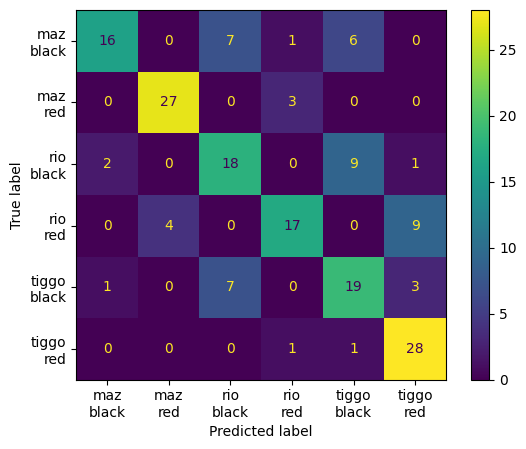

In [ ]:
pred = model2.predict(X_val)
y_pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_val,axis=1)

disp = ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred),
          display_labels = ['maz\nblack','maz\nred','rio\nblack','rio\nred','tiggo\nblack','tiggo\nred'])

disp.plot()

In [ ]:
pred = model2.predict(X_test)
y_pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_test,axis=1)

accuracy_score(y_true, y_pred)

6/6 [==============================] - 0s 76ms/step


0.65

## Test e Metriche di Performance

WIP

In [ ]:
import numpy as np

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    '''
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    '''

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()